# Overview
In this project I will investigate the TMDB movie dataset. The goal of this investigation is to provide tentative conclusions that can give us an overview to what the data can tell us.

## Contents of the investigation
* Data cleaning and wrangling
* Exploratory data analysis
* Conclusions



In [12]:
#Before we begin we need to import the dependencies we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory data analysis


#### Questions
* What are the genres with highest number of movie releases?
* What are the production companies with the highest number of movie releases?
* What does the correlation between revenue and popularity indicate?
* How are the budget and revenue correlated?


### Data cleaning and wrangling

#### Remove errant or inappropriate data

In [13]:
#Reading the data from the CSV file
df = pd.read_csv('tmdb-movies.csv')
#Investigating a summary of the data
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see from the summary printed above the following columns contain null values.
* imdb_id
* cast
* homepage
* director
* tagline
* keywords
* overview
* genres
* production_companies





Now our data contains 21 columns but, my investigation does not require the use of all the columns so some of the columns that contain errant data can be discarded all together as from the data set the only columns I need from the 21 columns are...


* id
* popularity
* original_title
* director
* runtime
* genres
* production_companies
* release_date
* vote_average
* release_year
* budget_adj
* revenue_adj

(unadjusted budget and revenue have been discarded because they will not provide acurate results)

Now this means from our columns that contain errant data the only columns that we will need to deal with are


* director
* genres
* production_companies

(As I will discard the rest of the columns as I do not need them)

My approach for dealing with null data in these columns will be simply to replace each null value with N/A and during the rest of our analysis N/A will be dealt with as its own category so as to perform further investigation if a signifacant indicator appears (e.g. N/A production company produces highest number of movies)



In [14]:
# dropping unneeded columns
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'cast', 'tagline', 'keywords', 'overview', 'vote_count'],axis = 1, inplace = True)
# Filling remaining null data with N/A
df.fillna("N/A")
print("Null data has been cleaned successfully...")

Null data has been cleaned successfully...


Now that we have dealt with the null data successfully we are now going to check for the appropriatness of the data and see if there are any inconsistencies like for example as I have seen from scrolling through the data some movies had a budget of zero and revenue of zero which are both illogical value for the respective data this means that such data need to be dealt with so as not to affect our analysis.

In [15]:
#Example of illogical data input
df.tail(5)

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
10861,21,0.080598,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,7.4,1966,0.000000,0.0
10862,20379,0.065543,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,5.7,1966,0.000000,0.0
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,6.5,1966,0.000000,0.0
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,5.4,1966,0.000000,0.0
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,1.5,1966,127642.279154,0.0


Here is an example from our data set where the values of budget and revenue are set to zero
Now I will deal with these illogical inputs by discarding any record where either the budget or the revenue are set to zero

In [16]:
# removing records containing illogical data
print("Data shape before removing illogical data... (rows,columns): ",df.shape)
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

print("Illogical data removed successfully..... (rows,columns): ", df.shape)
# showing example after illogical data has been removed
df.tail(5)

Data shape before removing illogical data... (rows,columns):  (10866, 12)
Illogical data removed successfully..... (rows,columns):  (3855, 12)


,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,Chenault Productions,6/21/66,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,7/13/66,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,El Dorado,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,7.0,1966,8.061618e+07,1.343603e+08
10848,2161,0.207257,Fantastic Voyage,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,6.7,1966,3.436265e+07,8.061618e+07


Next step in our data cleaning process is to check for duplicate rows...

In [17]:
#checking for number of duplicate rows
print("Current data shape (rows,columns): ",df.shape)
print("Number of duplicate rows: " + str(sum(df.duplicated())))

Current data shape (rows,columns):  (3855, 12)
Number of duplicate rows: 1


In [18]:
#Removing the duplicate rows
df.drop_duplicates(inplace = True)
print("Duplicate rows removed successfully... (rows,columns): ",df.shape)

Duplicate rows removed successfully... (rows,columns):  (3854, 12)


The final step of our data analysis will be to change the release dates into date time format...

In [19]:
#Changing the release date data type in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
#Printing the release data first 5 element to check conversion has been done successfully
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Exploratory data analysis

##### Q1: What are the genres with the highest number of movie releases?


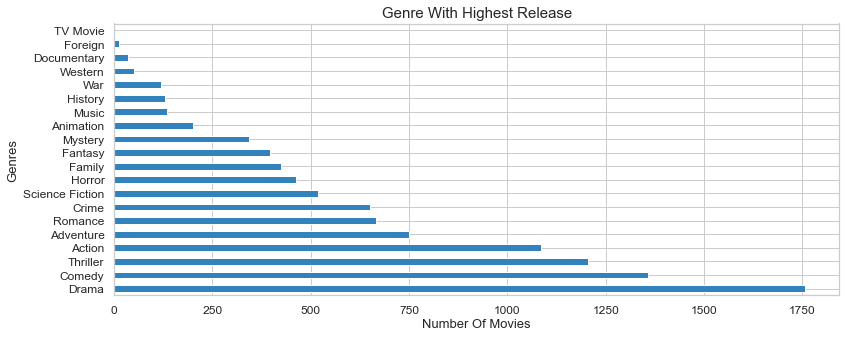

In [20]:
#make a function will will split the string and return the count of each genre.
def count(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,5),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

__It is clear from the above plot that the highest number of movie releases were in the drama genre__

#### Q2: What are the production companies with highest number of movie releases?
Using the count function we created earlier we are going to group each production company with the number of movies it has released and then sort them and plot them in a horizontal bar graph

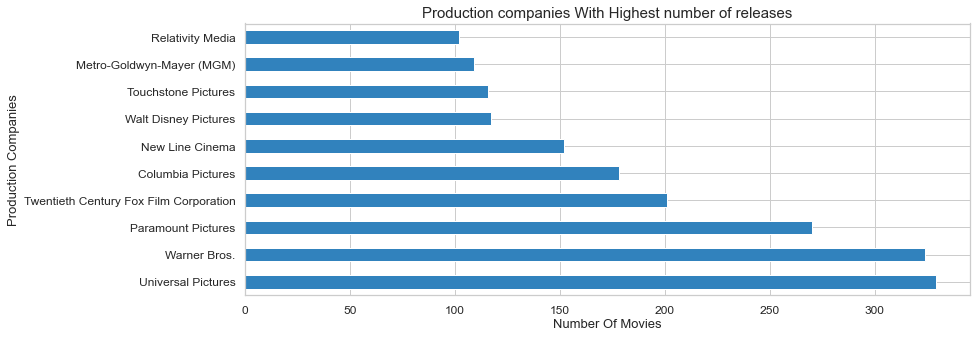

In [21]:
#call the function for grouping and countin values in the table
total_genre_movies = count('production_companies')
#plot a 'barh' plot using plot function for 'production companies vs number of movies'.
total_genre_movies.sort_values(axis= 0,ascending=False,inplace = True)
total_genre_movies[:10].plot(kind= 'barh',figsize = (13,5),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Production companies With Highest number of releases",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Production Companies",fontsize= 13)
sns.set_style("whitegrid")

__And from the above graph it is clear that the production company with the highest number of movie releases was Universal pictures with more than 300 movies released!!!!__

#### Q3: What is the correlation between revenue and popularity  indicate?
for this question I will conduct a multivariable 2D analysis on the popularity and revenue of movies by plotting a scatter plot and drawing a line of best fit between them.

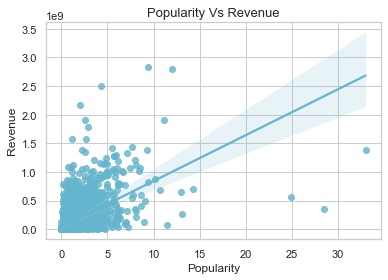

In [22]:
ax = sns.regplot(x=df['popularity'],y=df['revenue_adj'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Revenue",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

__The data set indicates that popularity and revenue are positively correlated which tentatively tells us that high revenue in a movie means it is probably popular although some extremes on the plot show us the there might be high popularity in the presence of low revenue which could possibly mean that there are other factors that affect popularity of a movie which could merit further investigation in the future__

#### Q4: How are the budget and revenue correlated?
For this I will draw a scatter plot to show the correlation between them


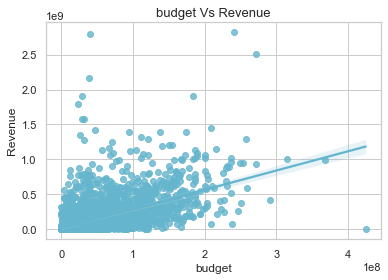

In [23]:
ax = sns.regplot(x=df['budget_adj'],y=df['revenue_adj'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("budget Vs Revenue",fontsize=13)
ax.set_xlabel("budget",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

__The correlation between the budget and revenue is positive but not very high which suggests that the return on investment in movies is usually not very high which is logical as only a few percentage of movies become block buster__

### Conclusions
In this analysis I investigated the following questions:
* 1.What are the genres with highest number of movie releases?
* 2.What are the production companies with the highest number of movie releases?
* 3.What does the correlation between revenue and popularity indicate?
* 4.How are the budget and revenue correlated?

In conclusion of my analysis I will briefly summarize my findings in each question and the limitations faced by these findings.

#### Q1 What are the genres with the highest number of movie releases?
From my analysis I have concluded that Drama had the highest number of movie releases and that TV movie had the lowest.
Limitations: Though the visualisation clearly states the conclusion during my cleaning process I assumed all the movies with zero budget or zero revenue to have not been released thus I have removed their records from the data which reduced the data from 10866 records to 3855 records the missing data is very likely to have affected the finding so it would be more helpful if further data is provided regarding these movies( e.g. Why was the budget zero?, Why was the revenue zero?, Were they even released?, etc..)
#### Q2 What are the production companies with the highest number of movie releases?
From the above graph which has been computed above it is clear that the production company with the highest number of movie releases was Universal pictures with more than 300 movies released.
Limitations: In addition to the limitation stated in Q1 there were a significant number of records where the producing company name was missing and in these instances I replaced the null value with N/A this cleaning action will have most probably affected the findings and furthermore an intersection between the null value of the production company and the zero budget/revenue problem will further amplify the affect of the limitation on the findings. A convenient solution would be to provide a table of data with more info about the missing production companies were the movies in this case produced by individuals? Were they hobby or amateur movies?

#### Q3 What does the correlation between revenue and popularity indicate?
The analysis showed a high positive correlation between popularity and revenue while this is probably logical it does not indicate causality so a further more insightful analysis would be to investigate the outlier where revenue was low and popularity was high or vice versa, this might provide use with more insight as to what affects the popularity of a movie since it is possible that revenue and popularity are not the same thing in the case of movie production.

limitations: Furthermore, since the popularity metric is not well defined in this data set I replaced it with the vote average for a more comprehensive approach to the data analysis, now this might affect the accuracy of the findings since my definition of popularity in this case is not aligned with that of the data set a solution to this limitation might be to provide more as to what constitutes the popularity metric and how it is calculated.

#### Q4 How are the budget and revenue correlated?
The low positive correlation between budget and revenue indicates but doesn't neccesarily conclude ( i.e. doesn't imply causality between low budget and low revenue or high budget and high revenue|) that movie production in general has a low ROI which contradict the common belief that movie production earns a lot of money as the data indicates that for the vast majority of movies this is not the case.

Limitations: As mentioned in Q1 the data cleaning process has elminated the all the records with zero budget/revenue and since these two variables are the main ones in this particular analysis surely this has massively affected the accuracy of the finding, and further information regardign this limitation will significantly improve the quality of the finding and its accuracy.